In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from atmosphere import atmosphere

%matplotlib inline

In [10]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

def knot2ms(Vknots):
    # convert from knots to m/s
    return(Vknots*0.514444)

def lb2N(x):
    # convert from lb to N
    return(x*4.44822)

def kg2N(x):
    # convert a mass in kg to a force in Newtons
    return(x*9.80665)

def ftpmin2mpsec(x):
    return(0.00508*x)

def fillbetween(x,y1,y2,c):
    plt.fill_between(x, y1, y2,
                     facecolor = c, # filling color
                     color = 'k', # outline color                     
                     alpha = 0.3)
    

In [11]:
# import the data
data = pd.read_csv('CASraw.csv', delimiter=',')
# numerical data
data_num = data.drop(columns=["A/C","STATUS","CREW","ENGINE"])
data

,A/C,STATUS,CREW,LENGTH [m],WIDTH [m],HEIGHT [m],EMPTY WEIGHT [Kg],MTOW [Kg],ENGINE,THRUST [lb],CEILING [m],RANGE [Km],SPEED [kts],S [m2]
0,L-159 ALCA,Active,1,12.72,9.64,4.87,4350,8000,Turbo-fan Honeywell F124-GA-100,6330.0,13200.0,1800.00,505.000,18.800
1,AT-802,Active,1,10.95,18.05,3.90,3000,7260,Turbo-prop P&W PT6A (5 blades),NaN,7620.0,1290.00,192.000,37.250
2,AT-6 Wolverine,Active,2,10.16,10.40,3.25,2670,4530,Turbo-prop P&W PT6A (4 blades),NaN,10700.0,2500.00,324.000,16.490
3,EMB 314,Active,2,11.33,11.14,3.97,3020,11464,Turbo-prop P&W PT6A-68 (5 blades),NaN,10670.0,2855.00,319.000,19.400
4,Cessna A-37,Retired,2,8.60,10.90,2.70,2815,6350,Turbojet GE J85-GE-17A,2850.0,12730.0,1500.00,440.000,17.090
5,A10,Active,1,16.16,17.42,4.42,13154,22950,2 X GE TF34-GE-100 turbofan,18130.0,13636.0,1287.48,364.970,47.000
6,SU 25,Active,1,15.33,14.36,4.80,10740,20500,2x Tumansky R-195,18960.0,7000.0,1375.00,513.000,33.700
7,DOUGLAS A-1,Retired,1,11.84,15.25,4.78,5429,11340,Radial Wright R-3350-26WA. 4 palas,NaN,8687.0,2115.00,172.000,37.192
8,F-100D,Retired,1,15.20,NaN,4.95,9500,15800,P&W J57 C-21,1200.0,15000.0,3210.00,750.000,37.000
9,AV-8B Harrier,Active,1,14.12,NaN,3.55,6340,14100,RR Pegasus F402 vectored thrust turbofan,23500.0,2200.0,585.00,22.610,22.610


In [12]:
#visualize the data
data_num

,LENGTH [m],WIDTH [m],HEIGHT [m],EMPTY WEIGHT [Kg],MTOW [Kg],THRUST [lb],CEILING [m],RANGE [Km],SPEED [kts],S [m2]
0,12.72,9.64,4.87,4350,8000,6330.0,13200.0,1800.00,505.000,18.800
1,10.95,18.05,3.90,3000,7260,NaN,7620.0,1290.00,192.000,37.250
2,10.16,10.40,3.25,2670,4530,NaN,10700.0,2500.00,324.000,16.490
3,11.33,11.14,3.97,3020,11464,NaN,10670.0,2855.00,319.000,19.400
4,8.60,10.90,2.70,2815,6350,2850.0,12730.0,1500.00,440.000,17.090
5,16.16,17.42,4.42,13154,22950,18130.0,13636.0,1287.48,364.970,47.000
6,15.33,14.36,4.80,10740,20500,18960.0,7000.0,1375.00,513.000,33.700
7,11.84,15.25,4.78,5429,11340,NaN,8687.0,2115.00,172.000,37.192
8,15.20,NaN,4.95,9500,15800,1200.0,15000.0,3210.00,750.000,37.000
9,14.12,NaN,3.55,6340,14100,23500.0,2200.0,585.00,22.610,22.610


/home/legnaa98/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/legnaa98/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


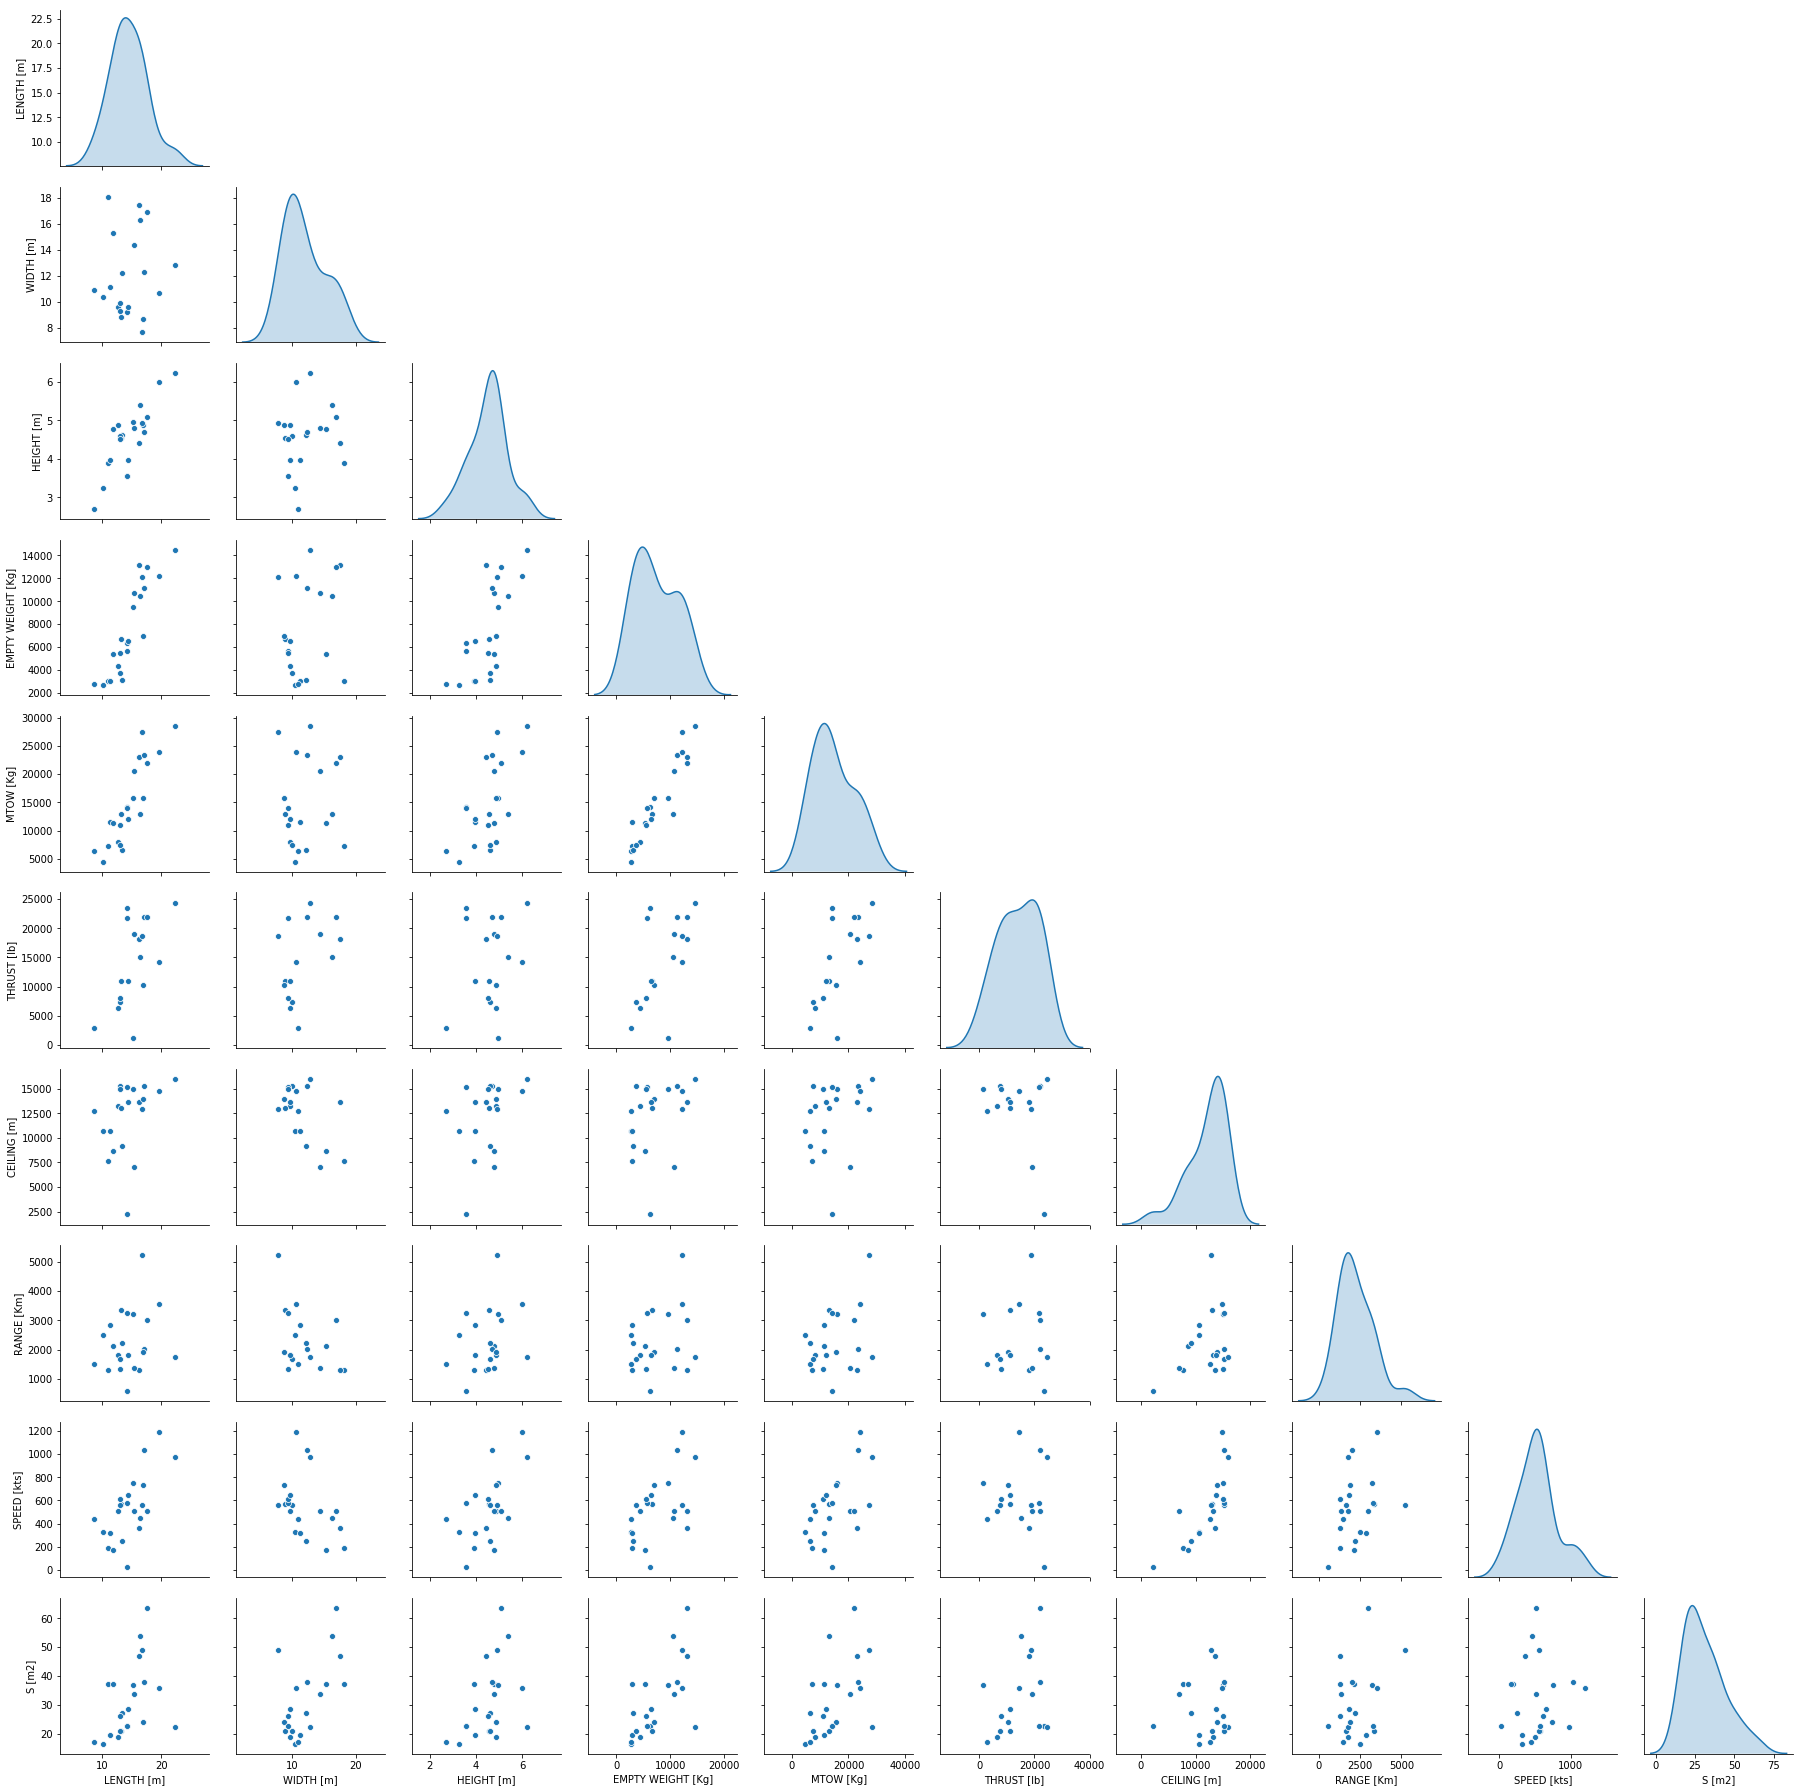

In [13]:
pairPlot = sns.pairplot(data_num, diag_kind='kde',)
pairPlot.map_upper(hide_current_axis)

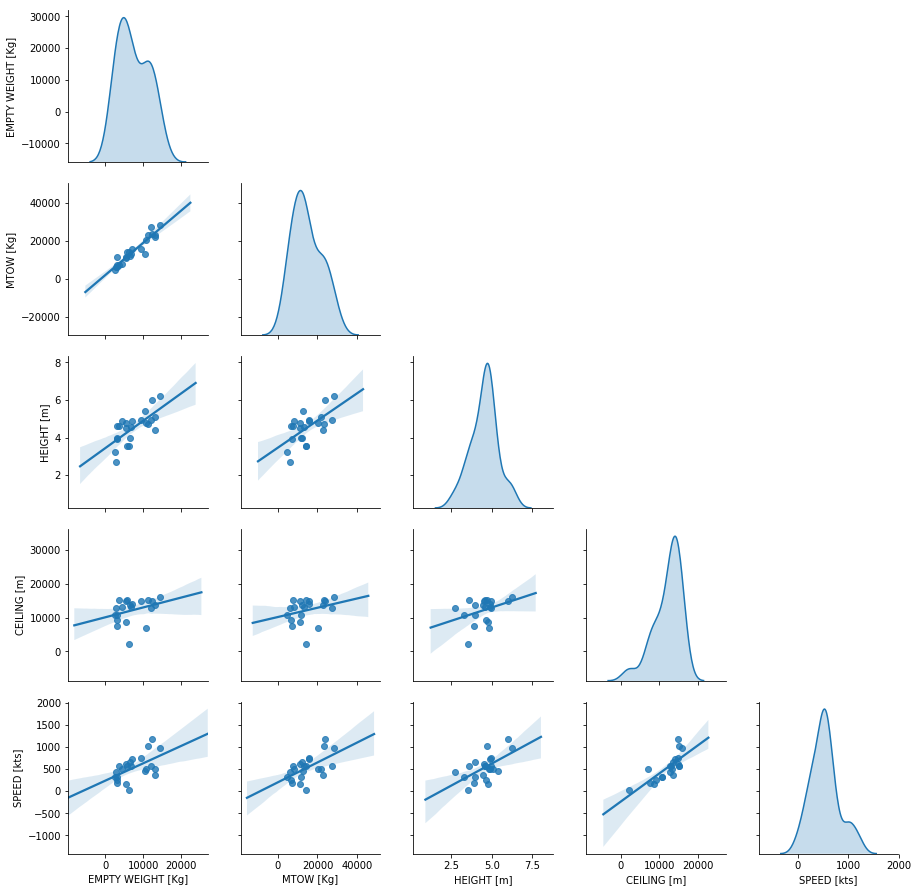

In [11]:
pairPlotRegressions = sns.pairplot(data, diag_kind='kde', kind='reg', vars=['EMPTY WEIGHT [Kg]', 'MTOW [Kg]','HEIGHT [m]','CEILING [m]', 'SPEED [kts]'])
pairPlotRegressions.map_upper(hide_current_axis)

In [6]:
pairPlotRegressions.savefig("Regressions.png")

145132.87711086954


(Text(0.5, 0, 'W/S [$N/m^2$]'), Text(0, 0.5, 'T/W'))

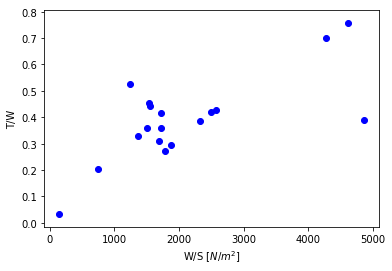

In [14]:
# Convert thrust from lbf to Newtons
ThrustInN = lb2N(data['THRUST [lb]']) # [N]
#Convert aircrafts' mass into weight
WeightInN = kg2N(data['MTOW [Kg]']) # [N]
MTOWStat = np.average(WeightInN)
print(MTOWStat)

# Compute Thrust to Weight Ratio
ThrustToWeightRatio = np.divide(ThrustInN, WeightInN) # Thrust to weight ratio with MOTW converted from lb to kg and then N (force)
# Compute wing load
WingLoad = np.divide(ThrustInN, data['S [m2]']) # [N/m2] W/S factor 


plt.scatter(WingLoad, ThrustToWeightRatio, color='blue') # A10 is the 5'th element of the list (indexing from zero)
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

#print(ThrustToWeightRatio,"\n", WingLoad)

# Matching Chart

## Stall Speed $V_s$

<img src="./UsefulTabularDataFromBooks/CLmax_Roskam.png">

(W/S)_Vs <= 2801.056 N/(m2) for a Stall Speed of Vs = 61.733 m/s


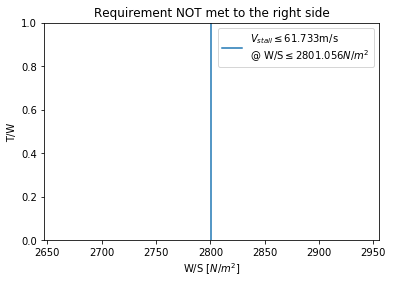

In [15]:
# Define useful constants
density_SL = atmosphere(0)[0] # [kg/m3] density at sea level
altitude = 0 # [m] altitude @ which all calculations will be made

CLmaxRef = 1.2 # Taken from Roskam book. THIS VALUE CAN CHANGE TO MEET REQS.

# Wing Load @ stall speed function ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def WS_Stall(Vs,CLmax):
    
    WingLoad_VStall = np.round(0.5*density_SL*Vs**2*CLmax,3)
    return(WingLoad_VStall)
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
VStall = 120 # [knot] Taken from Sadraey book, may vary between (100,120) for jet fighters. The A10 has a VStall=120 knots. THIS VALUE CAN CHANGE TO MEET REQS.
VStall = np.round(knot2ms(VStall),3) # [m/s] 

# Compute Wing load @ stall speed
WingLoad_VStall = WS_Stall(VStall,CLmaxRef) # [m/s]

plt.axvline(x=WingLoad_VStall)
plt.legend(['$V_{stall}\leq$'+str(VStall)+'m/s\n@ W/S$\leq$'+str(WingLoad_VStall)+'$N/m^2$'])
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')
plt.title('Requirement NOT met to the right side')
print('(W/S)_Vs <= '+str(WingLoad_VStall)+' N/(m2) for a Stall Speed of Vs = '+str(VStall)+' m/s')

## Take-Off Run $S_{TO}$
<img src='./UsefulTabularDataFromBooks/RWY_Friction.png'>
<img src='./UsefulTabularDataFromBooks/CDoLG_CDLoHLG.png'>
<img src="./UsefulTabularDataFromBooks/CDo_Sadraey.png">
<img src="./UsefulTabularDataFromBooks/TypicalAR_Sadraey.png">
<img src='./UsefulTabularDataFromBooks/STOG_Roskam.png'>
<img src='./UsefulTabularDataFromBooks/TypicalValuesforSTOG_Roskam.png'>



In [16]:
# Thrust to Weight Variation as a function of Take-off run -------------------------------------------------------------------------------------------------------------------------------------------------------
def TW_S_TO(CLmaxTO,WS,CDo,h,STO):
    '''
    Inputs:
    WS : Wing load arange
    CDo : zero lift drag coefficient
    CLmaxTO : max lift coefficient @ take-off
    STO : take-off run. [m]
    
    Output:
    ThrustToWeight_TO : T/W ratio @ take-off run. 
    
    Variables:
    
    '''
    
    # useful constants
    lmbda = 3 # Engine bypass ratio. THIS VALUE CAN CHANGE TO MEET REQS.
    k1 = 0.0447
    k2 = 0.75*(5+lmbda)/(4+lmbda)
    rho = atmosphere(h)[0]
    mu = 0.03 # friction coefficient of the runway according to Sadraey can vary between (0.03,0.05)
    
    ThrustToWeight_TO = np.divide(( np.multiply(k1/STO,WS)+CLmaxTO*mu+0.72*CDo), ( rho*CLmaxTO*k2 ))
    
    return(ThrustToWeight_TO)
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Requirement NOT met below the line')

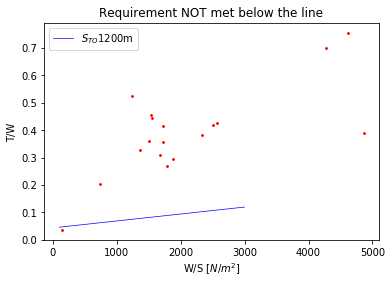

In [17]:
# Define the values within which the wing load will vary in the various functions
WingLoadVariation = np.linspace(100,3000,200) # [N/m2] vary wing load within the set values

# Data to be stored in a class (aircraft) in a latter version ----------------------------------------------------------------------------------------------------
TakeOffRun = 1200 # [m] specified in the RFP for when the A10 was made
CLmaxTO = 1.4 # Can vary between (1.4,2) according to Roskam. THIS VALUE CAN CHANGE TO MEET REQS.
C_Do = 0.03 # Zero drag. Taken as an average (slightly bigger) of Sadraey's typical values of zero lift drag in jet fighters . THIS VALUE CAN CHANGE TO MEET REQS.
Oswald = 0.95 # Oswald efficiency factor. THIS VALUE CAN CHANGE TO MEET REQS.
AR = 2.5 # Wing Aspect Ratio.THIS VALUE CAN CHANGE TO MEET REQS.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

MTOWStat = np.average(data['MTOW [Kg]']) # [kg] initial MTOW estimate from data base. THIS VALUE CAN CHANGE TO MEET REQS.
WingAreaStat = np.average(data['S [m2]']) # [m2] initial wing estimate from data base. THIS VALUE CAN CHANGE TO MEET REQS.

ThrustToWeight_TO = TW_S_TO(CLmaxTO, WingLoadVariation, C_Do, altitude,TakeOffRun)

plt.plot(WingLoadVariation, ThrustToWeight_TO, 'b-', linewidth=0.7)
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

plt.legend(['$S_{TO}$'+str(TakeOffRun)+'m'])
plt.plot(WingLoad,ThrustToWeightRatio,'ro',markersize=1.8)
plt.title('$C_{Do}$ = %.2f, $C_{L,max TO}$ = %.2f' %(C_Do,CLmaxTO))
plt.title('Requirement NOT met below the line')

### $S_{TO}$ Sensitivity Analysis

Text(0.5, 1.0, 'Requirement NOT met below the lines')

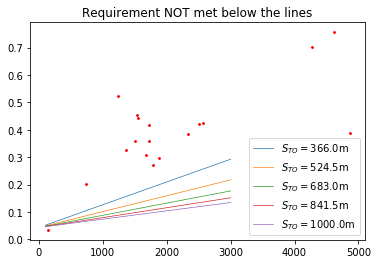

In [30]:
TOruns = np.linspace(366,1000,5)
TW_TO_cache =[]
legends = []

for t in range(len(TOruns)):
    TW_TO = TW_S_TO(CLmaxTO, WingLoadVariation, C_Do, altitude,TOruns[t])
    TW_TO_cache.append(TW_TO)
    plt.plot(WingLoadVariation, TW_TO, '-', linewidth=0.7)

    l = '$S_{TO} = $'+str(TOruns[t])+'m'
    legends.append(l)
plt.legend(legends)
plt.plot(WingLoad,ThrustToWeightRatio,'ro',markersize=1.8)
plt.title('Requirement NOT met below the lines')

## Rate Of Clim $ROC$

<img src="./UsefulTabularDataFromBooks/TypicalAR_Sadraey.png">
<img src='./UsefulTabularDataFromBooks/CDoLG_CDLoHLG.png'>
<img src='./UsefulTabularDataFromBooks/CLc_CLflap.png'>
<img src='./UsefulTabularDataFromBooks/ROC_Military_Roskam.png'>

In [19]:
def ROC_NEngines(CDo,CGR,AR,e,Inoperative=False,Sadraey=True,h=0,N=2):
    '''
    Inputs:
    CDo : Aircraft zero lift drag coefficient
    CGR : Climb Gradient.
    AR : Aspect Ratio
    e : Oswald efficiency factor
    Inoperative : Flag to determine wether an engine is inoperative or not. True, an eninge is inoperative, False, all engines are running
    Sadraey : flag to indicate sadraey's method to estimate (L/D)TO ratio. 
              True if you want to estimate it with this method, False to use a statistical value of a (L/D)max
    h : altitude at which everything will be calculated. Sea level by default [m]
    N : Number of engines, 2 by default, assumed a twin engine
    
    Outputs:
    ThrustToWeight_ROC : Thrust to weight ratio as a function of Rate of Climb
    
    Variables:
    LD         : Lift to drag ratio at the flight condition to be analyzed, take-off for this case
    CGR        : Climb Gradient, (Vertical Height in climb)/(Horizontal distance in climb).
                 Either specified in the RFP or a desired one.
    CD_TO      : Aircraft drag coefficient @ take-off configuration
    CDo_LG     : Landing gear drag coefficient. Can be taken from Sadraey's book
    CDo_HLD_TO : High lift device drag coefficient @ take-off configuration. Can be taken from Sadraey's book
    CL_TO      : Aircraft lift coefficient @ take-off configuration
    CLc        : Aircraft lift coefficient in cruise condition
    CLflapTO   : Lift coefficient of flaps during take-off. Can be taken from Sadraey's book
    '''
        
    if Sadraey == True:
        # Method to estimate lift to drag ratio propose in Sadraey's book
        # Lift to Drag estimate @ take-off ---------------------
        # drag coefficient @ take-off
        CDo_HLD_TO = 0.003 # THIS VALUE CAN CHANGE TO MEET REQS.
        CDo_LG = 0.006 # THIS VALUE CAN CHANGE TO MEET REQS.
        CDo_TO = CDo + CDo_LG + CDo_HLD_TO

        # lift coefficient @ take-off
        rho_alt = atmosphere(h)[0]
        K = 1/(np.pi*e*AR)
        CLc = 0.07 # THIS VALUE CAN CHANGE TO MEET REQS.
        CLflapTO = 0.4 # THIS VALUE CAN CHANGE TO MEET REQS.
        CL_TO = CLc + CLflapTO

        CD_TO = CDo_TO + K*CL_TO**2    
        # -------------------------------------------------------

        # Estimate L/D with previous data
        LD = CL_TO/CD_TO
    elif Sadraey == False:
        LD = 14 # Statistical value taken from XXXXXXXX, this value can vary between (9.2,14). # THIS VALUE CAN CHANGE TO MEET REQS.
    
    if Inoperative == True:
        ThrustToWeight_ROC = (N/(N-1)) *  ((LD)**(-1)+CGR)
    elif Inoperative == False:
        ThrustToWeight_ROC = ((LD)**(-1)+CGR)
    
    return(ThrustToWeight_ROC)

Text(0.5, 1.0, 'Requirement NOT met below the line')

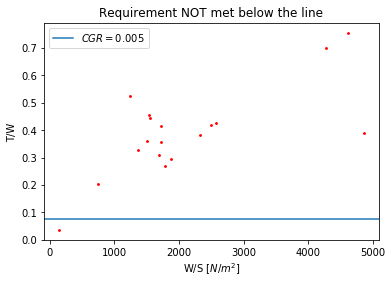

In [20]:
ROC = ftpmin2mpsec(10000) # [m/s] Specified in RFP
CGR = 0.005 # according to Roskam

TW_ROC = ROC_NEngines(C_Do, CGR, AR, Oswald, False, False)
plt.axhline(TW_ROC)
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')
plt.legend(['$CGR = 0.005$'])
plt.plot(WingLoad,ThrustToWeightRatio,'ro',markersize=1.8)
plt.title('Requirement NOT met below the line')

## Cruise Speed $V_{cruise}$
<img src='./UsefulTabularDataFromBooks/Vcruise_Sadraey.png'>


In [21]:
def TW_Vcruise(CDo,WS,AR,e,Vmax,h=0):
    '''
    Inputs:
    CDo : Aircraft zero lift drag coefficient
    WS : Wing Load arange. [N/m2]
    AR : Aspect Ratio
    e : Oswald efficiency factor
    Vmax : Maximum speed specified in RFP. [m/s]
    
    Output:
    
    Variables:
    Vc : Cruise Speed. [m/s]
    '''
    
    # compute cruise speed based on maximum speed
    Vc = Vmax/(1.3)
    
    # compute density at sea level
    rho_alt = atmosphere(0)[0]
    q = 0.5*rho_alt*Vc**2
       
    ThrustToWeight_Vc = CDo*q/(WS) + WS/(q*np.pi*AR*e)
    return(ThrustToWeight_Vc)

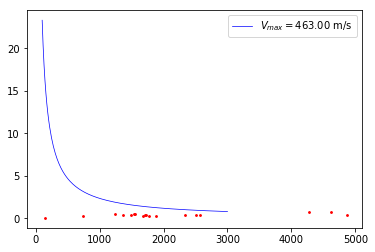

In [22]:
# Define Vmax based on RFP specifications
Vmax = knot2ms(900) # [m/s]

TW_Vc = TW_Vcruise(C_Do, WingLoadVariation, AR, Oswald, Vmax)
plt.plot(WingLoadVariation, TW_Vc, 'b-', linewidth=0.7)
plt.plot(WingLoad,ThrustToWeightRatio,'ro',markersize=1.8)
plt.legend(['$V_{max} = %.2f$ m/s' %(Vmax)])


Text(0.5, 1.0, 'Requirement NOT met below the lines')

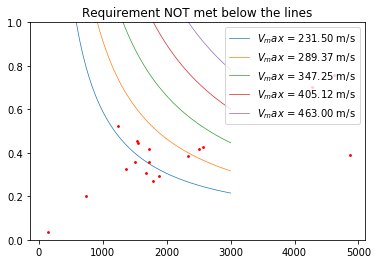

In [23]:
VmaxArange = np.linspace(0.5*Vmax,Vmax,5)
legends = []

for t in range(len(VmaxArange)):
    TW_Vc = TW_Vcruise(C_Do, WingLoadVariation, AR, Oswald, VmaxArange[t])
    plt.plot(WingLoadVariation, TW_Vc, '-', linewidth=0.7)

    l = '$V_max$ = %.2f m/s' %(VmaxArange[t])
    legends.append(l)

plt.ylim([0,1])
plt.legend(legends)
plt.plot(WingLoad,ThrustToWeightRatio,'ro',markersize=1.8)
plt.title('Requirement NOT met below the lines')

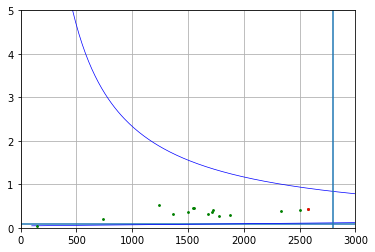

In [34]:
plt.plot(WingLoadVariation, TW_Vc, 'b-', linewidth=0.7)
plt.axhline(TW_ROC)
plt.plot(WingLoadVariation, ThrustToWeight_TO, 'b-', linewidth=0.7)
plt.axvline(x=WingLoad_VStall)
plt.plot(WingLoad,ThrustToWeightRatio,'go',markersize=1.8)
plt.plot(WingLoad[11],ThrustToWeightRatio[11],'ro',markersize=1.8)
plt.xlim([0,3000])
plt.ylim([0,5])
plt.grid(True)